<h1>Задание 1. Случайные величины</h1>

In [2]:
import numpy as np

np.random.seed(42)
n = 1000

b0 = 5
b1 = 3
b2 = -2
sigma_u = 2

Y = []
X1 = np.random.normal(3, 1, n)
X2 = np.random.poisson(4, n)
    

for _ in range(1000):
    
    u = np.random.normal(0, sigma_u, n)
    y = b0 + b1 * X1 + b2 * X2 + u
    Y.append(y)

In [3]:
import statsmodels.api as sm

b0_list = []
b1_list = []
b2_list = []

X = np.column_stack((np.ones(n), X1, X2))

for y in Y:
    model = sm.OLS(y, X).fit()
    b0_list.append(model.params[0])
    b1_list.append(model.params[1])
    b2_list.append(model.params[2])

coeffs = list(zip(b0_list, b1_list, b2_list))

for elem in coeffs[:10]:
    print(*elem)

4.408174862275461 3.1018349356489896 -1.965904901398321
5.004524102284451 3.0304408534213394 -2.0440632249968664
4.867675179176318 3.036675549484095 -1.9928060143726982
5.503992692912506 2.931260431434308 -2.0656656462130236
5.237725094353175 2.8986637860979174 -1.9896631839914976
5.185351414046057 2.9532901275886596 -2.0221298060657906
4.963967426067719 3.06300780145859 -2.046193348601878
4.761405809070849 3.0672309541341876 -2.009367377265635
5.126586474731509 3.0533646933005953 -2.0293968523988837
5.155161969446377 2.9939502766005903 -2.0250457547907548


In [4]:
intervals_b0 = []
intervals_b1 = []
intervals_b2 = []

total_covered_b0 = 0
total_covered_b1 = 0
total_covered_b2 = 0

cmap_b0 = [0] * 1000
cmap_b1 = [0] * 1000
cmap_b2 = [0] * 1000

for i in range(n):

    model = sm.OLS(Y[i], X).fit()
    conf_int = model.conf_int(alpha=0.05)
    
    intervals_b0.append(conf_int[0].tolist())
    intervals_b1.append(conf_int[1].tolist())
    intervals_b2.append(conf_int[2].tolist())


    if conf_int[0, 0] <= b0 <= conf_int[0, 1]:
        total_covered_b0 += 1
        cmap_b0[i] = 1

    if conf_int[1, 0] <= b1 <= conf_int[1, 1]:
        total_covered_b1 += 1
        cmap_b1[i] = 1

    if conf_int[2, 0] <= b2 <= conf_int[2, 1]:
        total_covered_b2 += 1
        cmap_b2[i] = 1

for elem in list(zip(cmap_b0, cmap_b1, cmap_b2))[:10]:
    print(*elem)

0 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1


In [5]:
mean_intercept = np.mean(b0_list)
mean_beta_1 = np.mean(b1_list)
mean_beta_2 = np.mean(b2_list)

print(f"Средние значения оцененных коэффициентов:")
print(f"Intercept: {mean_intercept:.4f} (Истинное значение: {b0})")
print(f"Beta_1: {mean_beta_1:.4f} (Истинное значение: {b1})")
print(f"Beta_2: {mean_beta_2:.4f} (Истинное значение: {b2})")

Средние значения оцененных коэффициентов:
Intercept: 4.9970 (Истинное значение: 5)
Beta_1: 3.0009 (Истинное значение: 3)
Beta_2: -2.0005 (Истинное значение: -2)


In [6]:
total_covered_b0 /= n
total_covered_b1 /= n
total_covered_b2 /= n

print(f"Процент доверительных интервалов, покрывающих истинные параметры:")
print(f"Intercept: {total_covered_b0 * 100:.2f}%")
print(f"Beta_1: {total_covered_b1 * 100:.2f}%")
print(f"Beta_2: {total_covered_b2 * 100:.2f}%")


Процент доверительных интервалов, покрывающих истинные параметры:
Intercept: 95.10%
Beta_1: 95.50%
Beta_2: 94.80%


In [7]:
var_intercept = np.var(b0_list, ddof=1)
var_beta_1 = np.var(b1_list, ddof=1)
var_beta_2 = np.var(b2_list, ddof=1)

print(f"Дисперсии оценок коэффициентов:")
print(f"Intercept: {var_intercept:.6f}")
print(f"Beta_1: {var_beta_1:.6f}")
print(f"Beta_2: {var_beta_2:.6f}")

Дисперсии оценок коэффициентов:
Intercept: 0.057565
Beta_1: 0.003880
Beta_2: 0.001027


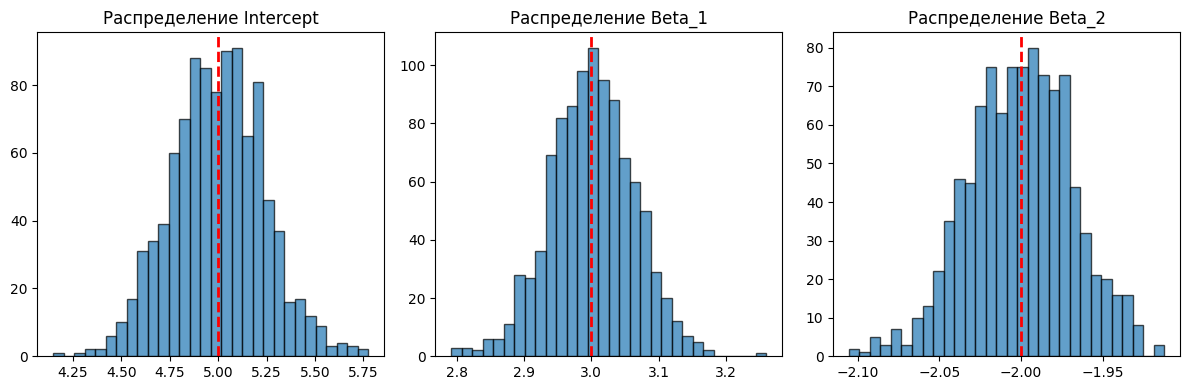

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(b0_list, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(b0, color="red", linestyle="dashed", linewidth=2)
plt.title("Распределение Intercept")

plt.subplot(1, 3, 2)
plt.hist(b1_list, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(b1, color="red", linestyle="dashed", linewidth=2)
plt.title("Распределение Beta_1")

plt.subplot(1, 3, 3)
plt.hist(b2_list, bins=30, edgecolor="k", alpha=0.7)
plt.axvline(b2, color="red", linestyle="dashed", linewidth=2)
plt.title("Распределение Beta_2")

plt.tight_layout()
plt.show()

<h1>Задание 2. Анализ корреляции и построение МНК-регрессии</h1>

In [ ]:
import pandas as pd

file_path = "htv.xls" 
df = pd.read_excel(file_path)

df.to_excel("htv.xlsx")

In [4]:

import statsmodels.api as sm
import numpy as np
from scipy import stats


file_path = "htv.xlsx" 
df = pd.read_excel(file_path)

column_names = [
    "index", "wage", "abil", "educ", "ne", "nc", "west", "south", "exper", 
    "motheduc", "fatheduc", "brkhme14", "sibs", "urban", "ne18", "nc18", 
    "south18", "west18", "urban18", "tuit17", "tuit18", "lwage", "expersq", "ctuit"
]

df.columns = column_names
df = df.drop(columns=["index"])


In [5]:
df["abil2"] = df["abil"] ** 2

X = df[["motheduc", "fatheduc", "abil", "abil2"]]
X = sm.add_constant(X)
y = df["educ"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     244.4
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          2.53e-154
Time:                        00:11:33   Log-Likelihood:                -2435.1
No. Observations:                1229   AIC:                             4880.
Df Residuals:                    1224   BIC:                             4906.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2405      0.288     28.657      0.0

<p><b>Регрессионная модель:</b> 

<code>educ = 8.2405 + 0.1901 * motheduc + 0.1089 * fatheduc + 0.4015 * abul + 0.0506 * abil2</p></code>

In [6]:

h = "abil2 = 0"
f_test = model.f_test(h)
print(f_test)

<F test: F=37.0467177291595, p=1.5406160504827527e-09, df_denom=1.22e+03, df_num=1>


<p>На основании F-теста и значения B4 = 0.0506 при p < 0.01 отвергаем гипотезу о линейности</p>

In [7]:
beta1 = model.params["motheduc"]
beta2 = model.params["fatheduc"]
e1 = model.bse["motheduc"]
e2 = model.bse["fatheduc"]

cov = model.cov_params().loc["motheduc", "fatheduc"]
var = e1**2 + e2**2 - 2 * cov

t = (beta1 - beta2) / np.sqrt(var)
pval = 2 * (1 - stats.t.cdf(t, len(df)-4))

print(f"T-test: t = {t:.4f}, p-value = {pval:.4f}")


T-test: t = 1.9349, p-value = 0.0532


На уровне значимости 5% Н0 не отвергается, но на уровне 10% уже отвергается

In [8]:
X2 = df[["motheduc", "fatheduc", "abil", "abil2", "tuit17", "tuit18"]]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     163.2
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          2.69e-152
Time:                        00:11:45   Log-Likelihood:                -2434.3
No. Observations:                1229   AIC:                             4883.
Df Residuals:                    1222   BIC:                             4918.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0822      0.313     25.826      0.0

In [9]:

h2 = "tuit17 = tuit18 = 0"
f_test2 = model2.f_test(h2)
print(f_test2)


<F test: F=0.8377369919652594, p=0.4329369345470866, df_denom=1.22e+03, df_num=2>


Большое значение p-value в F-тесте на совместную значимость, маленькие коэффициенты и большие p-value (0.801 и 1.000) в регрессии позволяют сказать, что эти переменные не значимы

In [10]:
corr = df["tuit17"].corr(df["tuit18"])
print(f"Корреляция: {corr:.4f}")

df["tuit_avg"] = (df["tuit17"] + df["tuit18"]) / 2

X3 = df[["motheduc", "fatheduc", "abil", "abil2", "tuit_avg"]]
X3 = sm.add_constant(X3)
model3 = sm.OLS(y, X3).fit()
print(model3.summary())

Корреляция: 0.9808
                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     196.0
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          1.84e-153
Time:                        00:16:28   Log-Likelihood:                -2434.3
No. Observations:                1229   AIC:                             4881.
Df Residuals:                    1223   BIC:                             4911.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0817      0.313 

Корреляция очень высока, а это значит, что переменные почти взаимозаменимы. Использование среднего предпочтительнее из-за мультиколлинеарности, упрощает интерпретацию и обеспечивает базовую защиту от выбросов. При таком анализе p-value снизился до 0.198, что по-прежнему незначимо. 


Возможно, связь не линейная, а, к примеру, U-образная. Проверим это графиком:

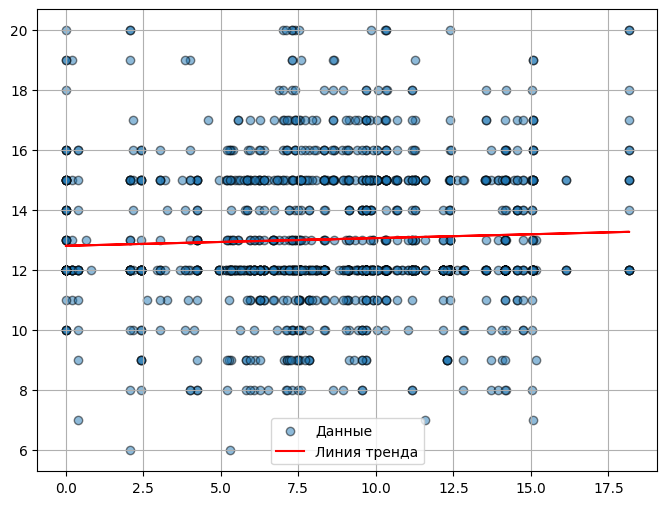

In [14]:
import matplotlib.pyplot as plt
m, b = np.polyfit(df["tuit_avg"], df["educ"], 1)

plt.figure(figsize=(8, 6))
plt.scatter(df["tuit_avg"], df["educ"], alpha=0.5, edgecolors="k", label="Данные")
plt.plot(df["tuit_avg"], m * df["tuit_avg"] + b, color="red", label="Линия тренда")
plt.legend()
plt.grid(True)
plt.show()

Горизонтальная линия тренда говорит о том, что связи нет, значит, мы не можем говорить о наличии каузации. Также вполне возможно, что данные не учитывают государственную поддержку, гранты и бюджетные места.

<h1>Задание 3. Теоретическое обоснование предположений Гаусса-Маркова</h1>

<h4>Предположение Гаусса-Маркова о нормальном распределении ошибок в модели линейной регрессии</h4>

В реальных данных ошибки обычно представляют собой сумму множества небольших случайных факторов, таких как влияние неучтенных переменных, ошибки измерения и иные особенности наблюдений. По Центральной предельной теореме, если такие факторы независимы и примерно одинаково распределены (тенденция многих из них к нормальности также обоснована ЦПТ), их суммарный эффект стремится к нормальному распределению, даже если отдельные факторы не нормальны. ПОэтому нормальное распределение - естественный и эмпирически верный выбор для моделирования случайных ошибок.

Это предположение значительно упрощает статистический анализ. Коэффициенты регрессии, оцененные МНК, также имеют нормальное распределение. Это позволяет нам использовать стандартные статистические тесты (t, F-тесты и прочее) для проверки гипотез и делать выводы о значимости переменных.

Кроме того, нормальность ошибок означает, что МНК-оценки не только являются несмещенными и эффективными среди всех линейных оценок (тот самый BLUE), но и являются наиболее точными среди всех возможных несмещенных оценок (MVUE), так как имеют наименьшую возможную дисперсию.

Еще предположение о нормальности помогает при малых выборках "отсеять" неудобные для анализа. В них ЦПТ не всегда успевает сработать, и распределение оценок может сильно зависеть от формы распределения ошибок - так что нормальность последних становится важным допущением.
